#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
import seaborn as sns

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [3]:
# Reading the data using pandas
mnist = mnist.load_data()

(X_train, y_train), (X_test, y_test) = mnist
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Flatten the images
X = X.reshape(X.shape[0], -1)

# Create a Pandas DataFrame
df = pd.DataFrame(X)
df['label'] = y



# print first five rows of df
df.head()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
# Drop the label feature and
# store the pixel data in d.
d = df.drop("label", axis=1)

# Step 3  :
## Standardize the data

In [5]:
# Data-preprocessing: Standardizing the data
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(70000, 784)


# Step 4 :  Reduce the columns data to 2 dimensions




In [6]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]

In [7]:
# Assuming 'label' column exists in the original dataframe 'df'
labels = df['label']
# Extract labels from the original dataframe
labels_1000 = labels[0:1000]


# Step 5 :
## define the model

In [9]:
model = TSNE(n_components=2, perplexity=30.0, learning_rate=200, n_iter=1000)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000


# Step 6 :
## Fit the model

In [10]:

# creating a new data frame which
# help us in plotting the result data
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))


# Step 7 :
##  Plotting the result

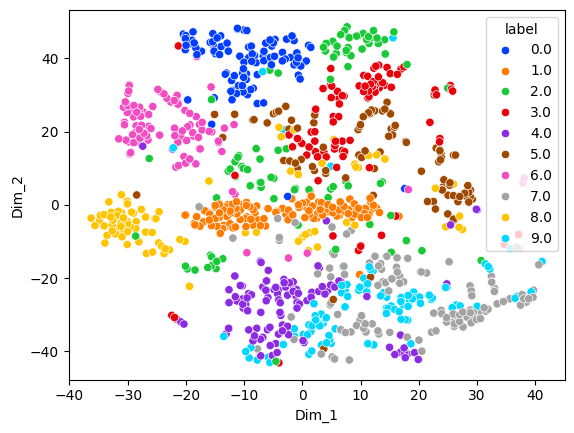

In [11]:
# Plotting the result of tsne
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()


#**Well Done**